# dt on the whole data:


In [24]:
num_of_lines=2000

In [29]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [30]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [31]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [32]:
dataset.shape

(976, 70)

In [33]:
target = dataset[['ICU_mortality']]
dataset=dataset.drop(['28_mortality'], axis=1)
dataset=dataset.drop(['HOSP_mortality'], axis=1)
dataset=dataset.drop(['90 days mortality'], axis=1)
dataset=dataset.drop(['ICU_mortality'], axis=1)
dataset=dataset.drop(['ICU_LOS'], axis=1)
dataset.head()

,ser_num,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,LOS_8-13,0,1,0,1,72,F,65.0,23.875115,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,LOS_5-7,0,1,0,1,58,M,101.0,32.979592,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,LOS_8-13,0,0,1,1,44,M,70.0,22.857143,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,LOS_5-7,0,1,1,0,71,F,48.0,19.227688,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,LOS_8-13,1,1,1,0,60,F,85.0,32.791945,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['active problems'] = le.fit_transform(dataset['active problems'].astype(str))
dataset['background problems'] = le.fit_transform(dataset['background problems'].astype(str))
dataset['gender'] = le.fit_transform(dataset['gender'].astype(str))
dataset['feeding'] = le.fit_transform(dataset['feeding'].astype(str))
dataset['LOS_Group'] = le.fit_transform(dataset['feeding'].astype(str))

dataset.head()

,ser_num,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,0,0,1,0,1,72,0,65.0,23.875115,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,0,0,1,0,1,58,1,101.0,32.979592,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,1,0,0,1,1,44,1,70.0,22.857143,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,0,0,1,1,0,71,0,48.0,19.227688,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,0,1,1,1,0,60,0,85.0,32.791945,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [35]:
dataset.shape

(976, 65)

In [36]:
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=.2)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,ser_num,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
614,1534,1,0,0,1,1,58,0,50.0,22.222222,...,0.0,0.0,0.0,0.0,0.783200,0.268400,1.228560,1.728000,1.273200,0.000000
760,1898,2,0,0,1,0,22,1,70.0,26.672763,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
68,183,0,0,0,1,0,60,1,88.0,28.734694,...,0.0,0.0,0.0,0.0,0.000000,0.407636,0.829091,0.829091,0.417136,0.000000
655,1636,0,1,1,1,1,78,0,90.0,31.141869,...,0.0,0.0,0.0,0.0,0.383615,0.469333,0.570207,0.704000,0.704000,0.704000
260,663,0,1,0,0,0,61,1,100.0,30.864198,...,0.0,0.0,0.0,0.0,1.121000,1.368000,1.368000,1.275993,0.726845,0.773813


# DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)  #train parameters: features and target
pred = dtree.predict(x_test)  #parameter: new data to predict

In [42]:
from sklearn.metrics import accuracy_score,recall_score
recall_score(y_test, pred)
#parameters: targets to be predicted and predictions from new data used before

0.4222222222222222

In [36]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', recall_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', recall_score(y_test, pred))

Criterion=gini 0.275
Criterion=entropy 0.375


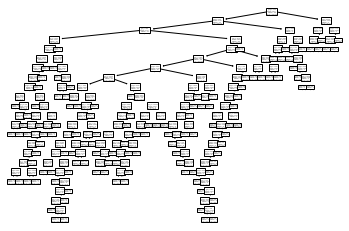

In [37]:
from sklearn import tree
tree.plot_tree(dtree);

explore by depth

In [40]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(recall_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(recall_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

In [41]:
d.head(20)

,acc_gini,acc_entropy,max_depth
0,0.125,0.125,1
1,0.075,0.050,2
2,0.150,0.125,3
3,0.175,0.100,4
4,0.125,0.100,5
5,0.125,0.075,6
6,0.100,0.075,7
7,0.150,0.075,8
8,0.125,0.100,9
9,0.275,0.150,10


In [46]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=18)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)
#Accuracy: 0.814

0.3

# RandomForestClassifier

In [44]:
	
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf_4 = RandomForestClassifier(criterion='entropy', max_depth=18)
clf_4.fit(x_train, y_train)
 #x_train, x_test, y_train, y_test
# Predict on training set
pred_y_4 = clf_4.predict(x_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( recall_score(y_test, pred_y_4) )
# 0.9744
 

<ipython-input-47-372fa2ee73ca>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_4.fit(x_train, y_train)


[0 1]
0.1


# imbalanced-learn

In [58]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\97254\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (169, 8)
Shape of X after SMOTE: (266, 8)

Balance of positive and negative classes (%):


1.0    50.0
0.0    50.0
Name: outcome1, dtype: float64

In [61]:
X_sm.shape

(266, 8)

In [72]:
y_sm.shape

(266,)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=.3)


In [63]:
dtree.fit(x_train, y_train)  #train parameters: features and target
pred = dtree.predict(x_test)  #parameter: new data to predict

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.55

In [65]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.575
Criterion=entropy 0.525


In [66]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

In [67]:
d.head(20)

,acc_gini,acc_entropy,max_depth
0,0.5500,0.4250,1
1,0.5500,0.4500,2
2,0.5750,0.5500,3
3,0.5875,0.4875,4
4,0.5875,0.5000,5
5,0.5625,0.4250,6
6,0.6000,0.6375,7
7,0.6125,0.6125,8
8,0.5375,0.6250,9
9,0.6000,0.5000,10


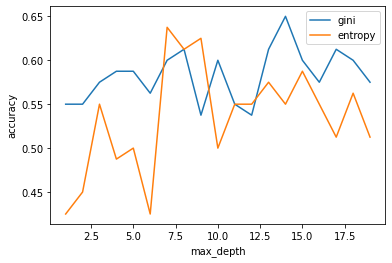

In [68]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [73]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)


0.6625

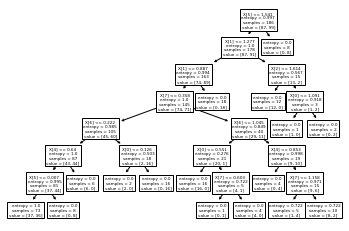

In [74]:
from sklearn import tree
tree.plot_tree(dtree);

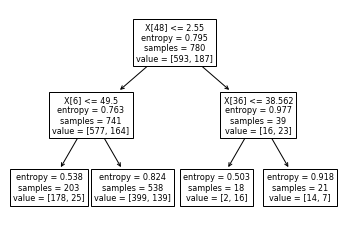

In [25]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

In [27]:
x_train.columns[6]

'age'

RandomForestClassifier again:

In [76]:
clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
 #x_train, x_test, y_train, y_test
# Predict on training set
pred_y_4 = clf_4.predict(x_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
 

[0. 1.]
0.7
